In [2]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from fill_NaNval import Filler 

In [3]:
Data1 = pd.read_csv("prof_data.csv")
Data1.head()

/tmp/ipykernel_12221/399576771.py:1: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  Data1 = pd.read_csv("prof_data.csv")


,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context
0,1,8,653.0,195.0,4324.0,1917829.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,50,659.0,198.0,4096.0,1917495.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,89,645.0,149.0,4054.0,1917365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,128,752.0,213.0,4090.0,1918146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,169,652.0,232.0,4088.0,1919319.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
ppg_filler = Filler()
Data1 = ppg_filler.fill_all_Id(Data1, deg_ppg= 3, deg_hr= 2)

/home/dice/Desktop/BBDC/task/fill_NaNval.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ppg_filled'] = df['ppgValue']
/home/dice/Desktop/BBDC/task/fill_NaNval.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ppg_filled'] = df['ppgValue']
/home/dice/Desktop/BBDC/task/fill_NaNval.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [8]:
Data1.head()

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context,ppg_filled,hr_filled
0,1,8,653.0,195.0,4324.0,1917829.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1917829.0,45.437205
1,1,50,659.0,198.0,4096.0,1917495.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1917495.0,45.437984
2,1,89,645.0,149.0,4054.0,1917365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1917365.0,45.438708
3,1,128,752.0,213.0,4090.0,1918146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1918146.0,45.439431
4,1,169,652.0,232.0,4088.0,1919319.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1919319.0,45.440192


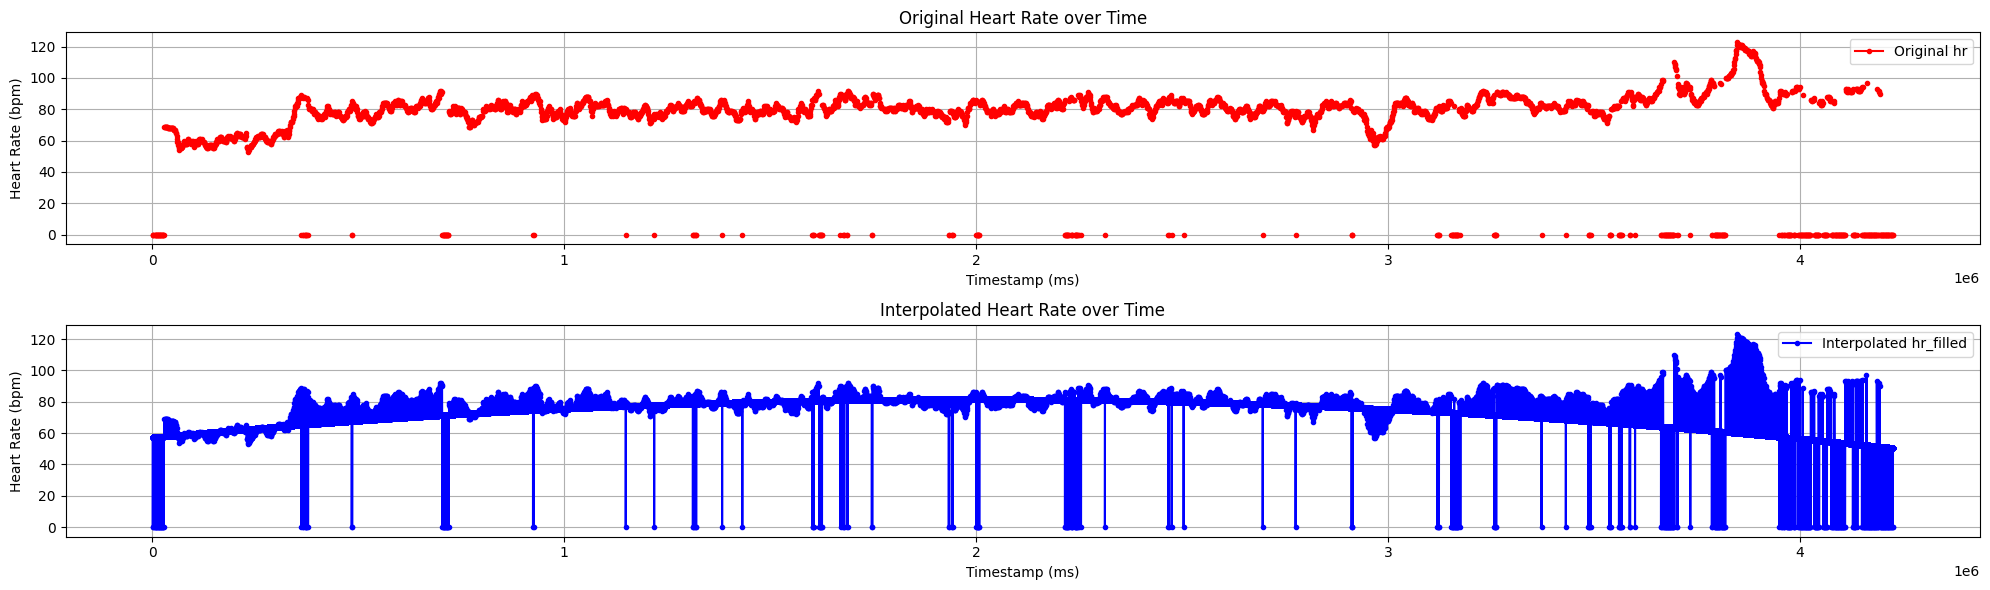

In [9]:
#hr value test.
df =  Data1[Data1['sessionId'] == 48]

plt.figure(figsize=(20, 6))
plt.subplot(2, 1, 1)
plt.plot(df['timestamp'], df['hr'], marker='.', linestyle='-', color='red', label='Original hr')
plt.title('Original Heart Rate over Time')
plt.xlabel('Timestamp (ms)')
plt.ylabel('Heart Rate (bpm)')
plt.grid(True)
plt.legend()

# Create the second subplot for the interpolated 'ppg_filled'
plt.subplot(2, 1, 2)
plt.plot(df['timestamp'], df['hr_filled'], marker='.', linestyle='-', color='blue', label='Interpolated hr_filled')
plt.title('Interpolated Heart Rate over Time')
plt.xlabel('Timestamp (ms)')
plt.ylabel('Heart Rate (bpm)')
plt.grid(True)
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


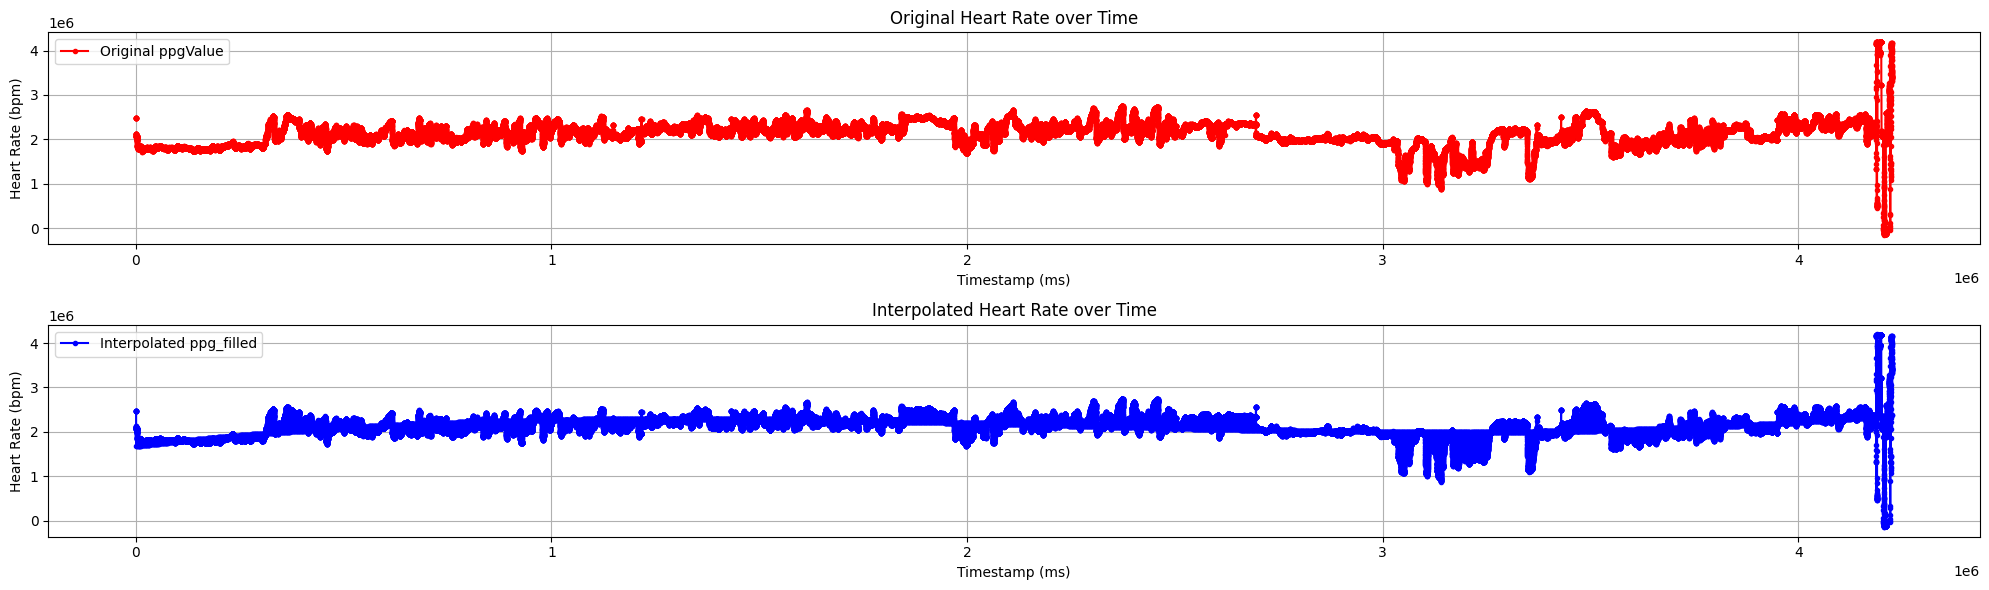

In [322]:
#PPGvalue test.
df =  Data1[Data1['sessionId'] == 48]

plt.figure(figsize=(20, 6))
plt.subplot(2, 1, 1)
plt.plot(df['timestamp'], df['ppgValue'], marker='.', linestyle='-', color='red', label='Original ppgValue')
plt.title('Original Heart Rate over Time')
plt.xlabel('Timestamp (ms)')
plt.ylabel('Heart Rate (bpm)')
plt.grid(True)
plt.legend()

# Create the second subplot for the interpolated 'ppg_filled'
plt.subplot(2, 1, 2)
plt.plot(df['timestamp'], df['ppg_filled'], marker='.', linestyle='-', color='blue', label='Interpolated ppg_filled')
plt.title('Interpolated Heart Rate over Time')
plt.xlabel('Timestamp (ms)')
plt.ylabel('Heart Rate (bpm)')
plt.grid(True)
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [8]:
df =  Data1[Data1['sessionId'] == 48]
df_clean = df.dropna(subset=['hr'])  

# Perform polynomial interpolation (quadratic)
poly_coeffs = np.polyfit(df_clean['timestamp'], df_clean['hr'], 3)
filled_values = np.poly1d(poly_coeffs)(df['timestamp'])


df['hr_filled'] = df['hr']

#df['hr_filled'].fillna(pd.Series(filled_values), inplace=True)

df.loc[df['hr_filled'].isna(), 'hr_filled'] = filled_values[df['hr_filled'].isna()]


# Print the DataFrame with filled 'ppg_filled' values
df

/tmp/ipykernel_10639/2368077931.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hr_filled'] = df['hr']


,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context,hr_filled
8715478,48,589,-998.0,1398.0,3805.0,2476919.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.040105
8715479,48,629,-948.0,1370.0,3704.0,2477356.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.040539
8715480,48,669,-963.0,1399.0,3627.0,2476721.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.040973
8715481,48,709,-909.0,1387.0,3669.0,2475558.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.041407
8715482,48,750,-976.0,1382.0,3689.0,2474739.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.041852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8824673,48,4225425,NaN,NaN,NaN,NaN,0.0,0.0,-10.0,0.0,NaN,NaN,NaN,NaN,0.000000
8824674,48,4225455,-808.0,42.0,4038.0,3349663.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.669025
8824675,48,4225495,-792.0,-89.0,3885.0,3404833.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.667364
8824676,48,4225535,-806.0,-78.0,4130.0,3316474.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.665704


In [6]:
len(df)

109200

In [15]:
Data1.head()

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context
0,1,8,653.0,195.0,4324.0,1917829.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,50,659.0,198.0,4096.0,1917495.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,89,645.0,149.0,4054.0,1917365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,128,752.0,213.0,4090.0,1918146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,169,652.0,232.0,4088.0,1919319.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [294]:
df_clean = Data1.dropna(subset=['ppgValue'])  

# Perform polynomial interpolation (quadratic)
poly_coeffs = np.polyfit(df_clean['timestamp'], df_clean['ppgValue'], 3)
filled_values = np.poly1d(poly_coeffs)(Data1['timestamp'])

# Assign the interpolated values to NaN values in 'ppgValue' column

Data1['ppg_filled'] = Data1['ppgValue']

#df['ppg_filled'].fillna(pd.Series(filled_values), inplace=True)
Data1.loc[Data1['ppg_filled'].isna(), 'ppg_filled'] = filled_values[Data1['ppg_filled'].isna()]


# Print the DataFrame with filled 'ppg_filled' values
Data1

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context,ppg_filled
0,1,8,653.0,195.0,4324.0,1917829.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.917829e+06
1,1,50,659.0,198.0,4096.0,1917495.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.917495e+06
2,1,89,645.0,149.0,4054.0,1917365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.917365e+06
3,1,128,752.0,213.0,4090.0,1918146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.918146e+06
4,1,169,652.0,232.0,4088.0,1919319.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.919319e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8824673,48,4225425,NaN,NaN,NaN,NaN,0.0,0.0,-10.0,0.0,NaN,NaN,NaN,NaN,2.078622e+06
8824674,48,4225455,-808.0,42.0,4038.0,3349663.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.349663e+06
8824675,48,4225495,-792.0,-89.0,3885.0,3404833.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.404833e+06
8824676,48,4225535,-806.0,-78.0,4130.0,3316474.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.316474e+06


In [311]:
Data1['sessionId'].unique()

array([ 1,  2,  3,  4,  6,  7,  8,  9, 10, 14, 15, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 49, 50, 51, 53, 54, 55, 56, 57, 58, 30, 11, 16,
       28, 48])

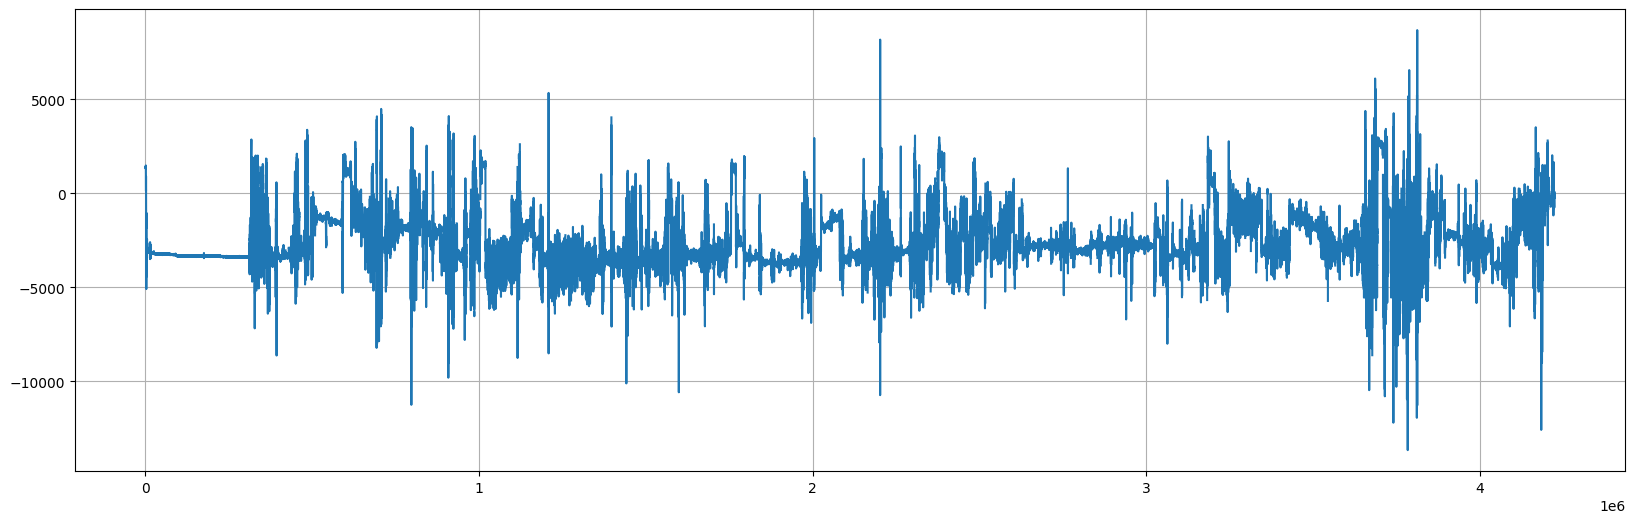

In [318]:
df =  Data1[Data1['sessionId'] == 48]
x = df["timestamp"]
y = df["y"]

plt.figure(figsize=(20,6))
plt.plot(x,y)
plt.grid()
plt.show()

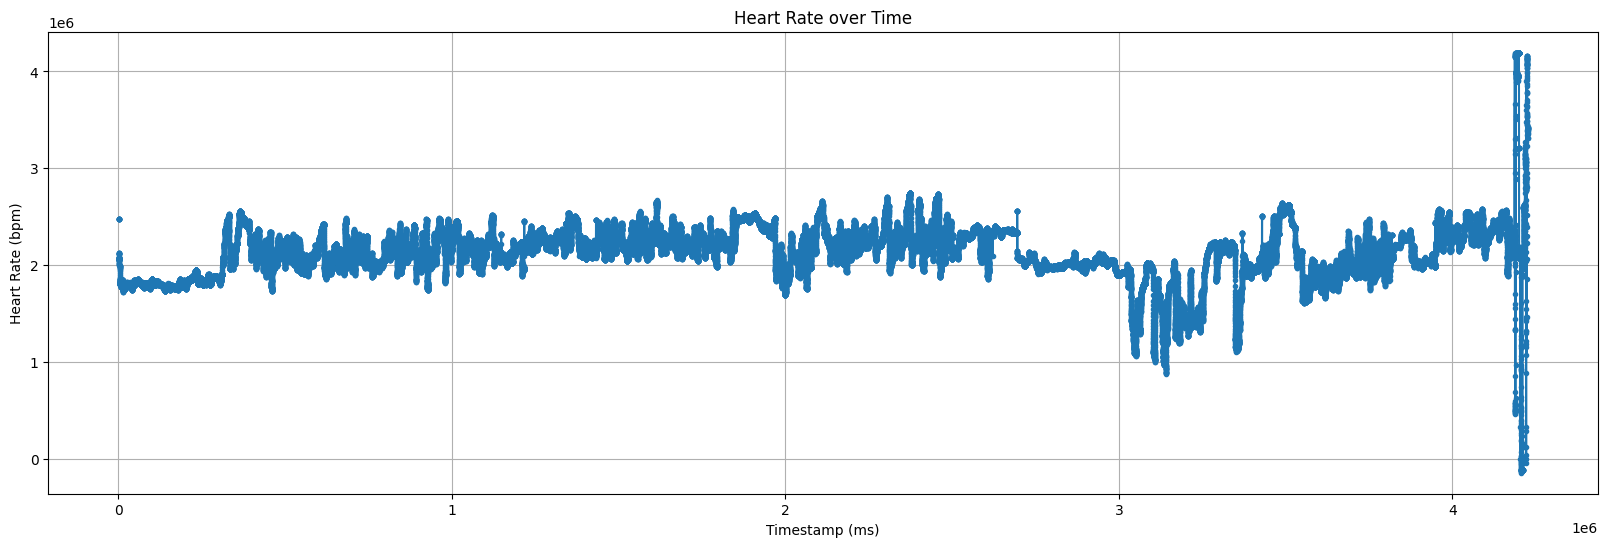

In [307]:
plt.figure(figsize=(20, 6))
plt.plot(df['timestamp'], df['ppgValue'], marker = ".", linestyle='-')
plt.title('Heart Rate over Time')
plt.xlabel('Timestamp (ms)')
plt.ylabel('Heart Rate (bpm)')
plt.grid(True)
plt.show()

In [309]:
df_clean = df.dropna(subset=['ppgValue'])  

# Perform polynomial interpolation (quadratic)
poly_coeffs = np.polyfit(df_clean['timestamp'], df_clean['ppgValue'], 3)
filled_values = np.poly1d(poly_coeffs)(df['timestamp'])

# Assign the interpolated values to NaN values in 'ppgValue' column

df['ppg_filled'] = df['ppgValue']

#df['ppg_filled'].fillna(pd.Series(filled_values), inplace=True)
df.loc[df['ppg_filled'].isna(), 'ppg_filled'] = filled_values[df['ppg_filled'].isna()]

#df.loc[df['ppgValue'].isna(), 'ppg_filled'] = filled_values[df['ppgValue'].isna()]

# Print the DataFrame with filled 'ppg_filled' values
df

/tmp/ipykernel_32647/1452512689.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ppg_filled'] = df['ppgValue']


,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context,ppg_filled
8715478,48,589,-998.0,1398.0,3805.0,2476919.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.476919e+06
8715479,48,629,-948.0,1370.0,3704.0,2477356.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.477356e+06
8715480,48,669,-963.0,1399.0,3627.0,2476721.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.476721e+06
8715481,48,709,-909.0,1387.0,3669.0,2475558.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.475558e+06
8715482,48,750,-976.0,1382.0,3689.0,2474739.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.474739e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8824673,48,4225425,NaN,NaN,NaN,NaN,0.0,0.0,-10.0,0.0,NaN,NaN,NaN,NaN,2.376058e+06
8824674,48,4225455,-808.0,42.0,4038.0,3349663.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.349663e+06
8824675,48,4225495,-792.0,-89.0,3885.0,3404833.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.404833e+06
8824676,48,4225535,-806.0,-78.0,4130.0,3316474.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.316474e+06


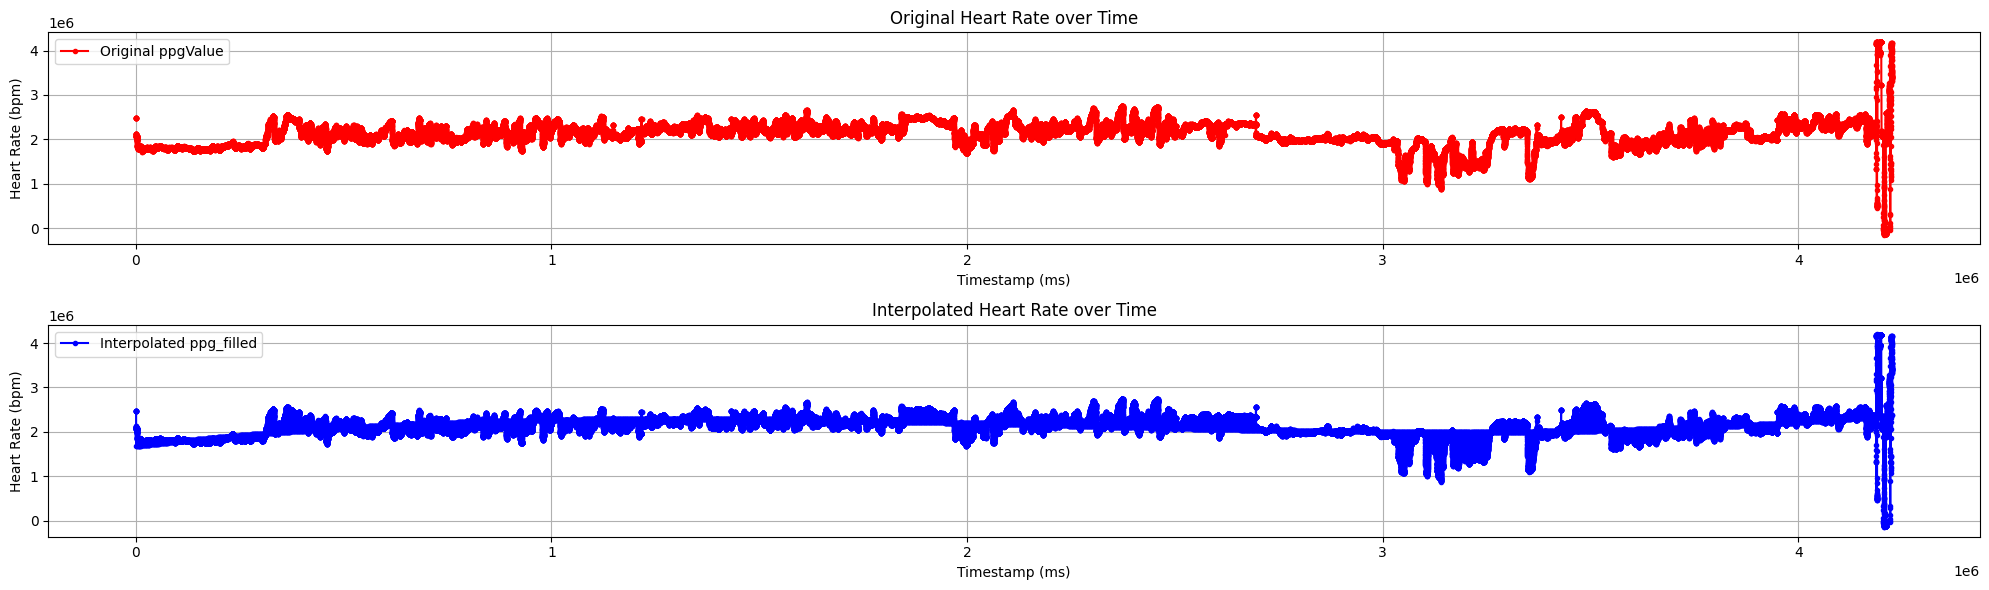

In [305]:
df

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context,ppg_filled
0,1,8,653.0,195.0,4324.0,1917829.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1917829.0
1,1,50,659.0,198.0,4096.0,1917495.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1917495.0
2,1,89,645.0,149.0,4054.0,1917365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1917365.0
3,1,128,752.0,213.0,4090.0,1918146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1918146.0
4,1,169,652.0,232.0,4088.0,1919319.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1919319.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207396,1,8021187,-1804.0,2496.0,2542.0,2066180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2066180.0
207397,1,8021227,-1855.0,2539.0,2532.0,2066288.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2066288.0
207398,1,8021267,-1956.0,2563.0,2574.0,2066140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2066140.0
207399,1,8021307,-1717.0,2380.0,2666.0,2064445.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2064445.0


In [235]:
filled_values[df['ppgValue'].isna()]

array([2338782.33659352, 2338716.99909212, 2338651.66159072, ...,
       2013968.90515027, 2013903.56764888, 2013838.23014748])

In [200]:
filled_values

array([2338783.97003105, 2338782.33659352, 2338781.35653099, ...,
       2013810.78839689, 2013808.17489683, 2013805.56139678])

In [188]:
df_clean 

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context
1665932,18,10,159.0,1874.0,3289.0,2390577.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1665934,18,50,-4.0,1818.0,3555.0,2391530.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1665935,18,90,-16.0,1750.0,3574.0,2392106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1665936,18,130,53.0,1905.0,3486.0,2392965.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1665937,18,170,61.0,1914.0,3700.0,2393411.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794571,18,4973692,246.0,-113.0,4178.0,2111967.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1794572,18,4973732,188.0,-181.0,4101.0,2112686.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1794573,18,4973772,-5.0,-673.0,3448.0,2113348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1794574,18,4973812,192.0,10.0,4409.0,2113936.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [210]:
data = {
    'timestamp': [8, 50, 89, 128, 169, 209, 250],
    'ppg': [70, 72, None, 75, None, 78, 80]  # Replace None with your actual missing values
}

# Create DataFrame
df = pd.DataFrame(data)

In [214]:
df_clean = df.dropna(subset=['ppg'])

# Perform polynomial interpolation
poly_coeffs = np.polyfit(df_clean['timestamp'], df_clean['ppg'], 3)
filled_values = np.poly1d(poly_coeffs)(df['timestamp'])

# Fill NaN values in 'ppg' column with interpolated values
df['ppg_filled'] = df['ppg'].fillna(pd.Series(filled_values))
df

,timestamp,ppg,ppg_filled
0,8,70.0,70.000000
1,50,72.0,72.000000
2,89,NaN,73.579232
3,128,75.0,75.000000
4,169,NaN,76.435149
5,209,78.0,78.000000
6,250,80.0,80.000000


In [209]:
pd.Series(filled_values)

0    69.990289
1    72.022853
2    73.579232
3    74.974261
4    76.435149
5    78.022431
6    79.990166
dtype: float64

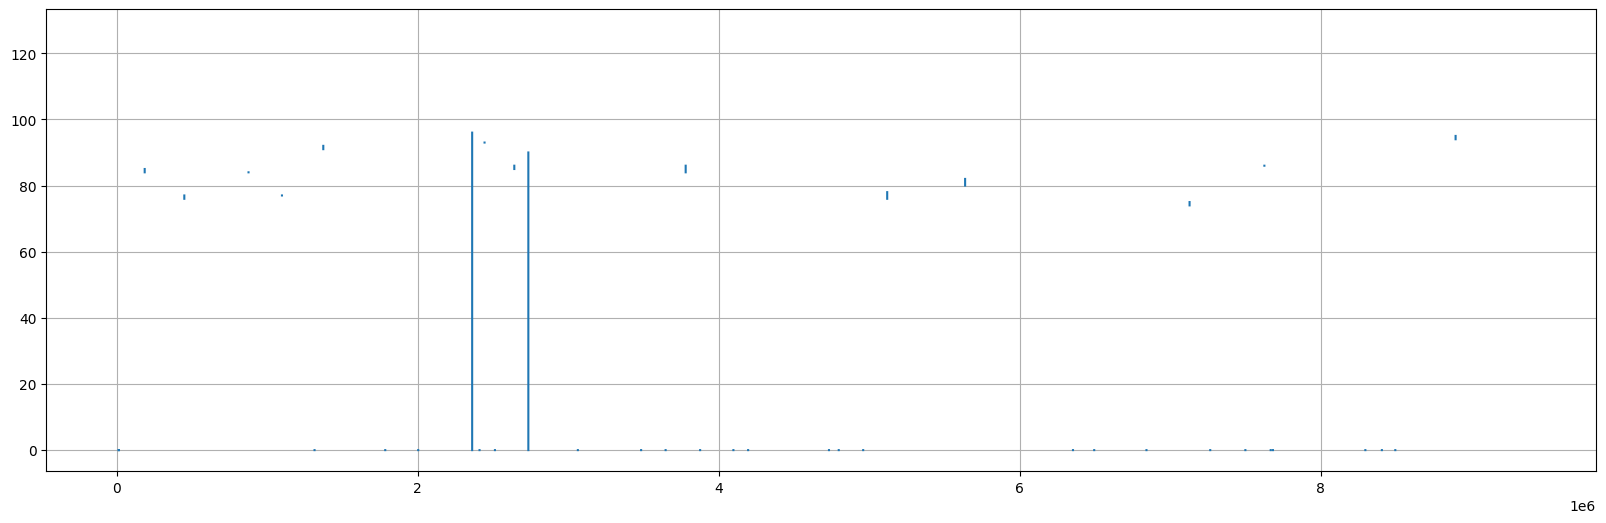

In [134]:
x = Data1["timestamp"]
y = Data1["hr"]

plt.figure(figsize=(20,6))
plt.plot(x,y)
plt.grid()
plt.show()

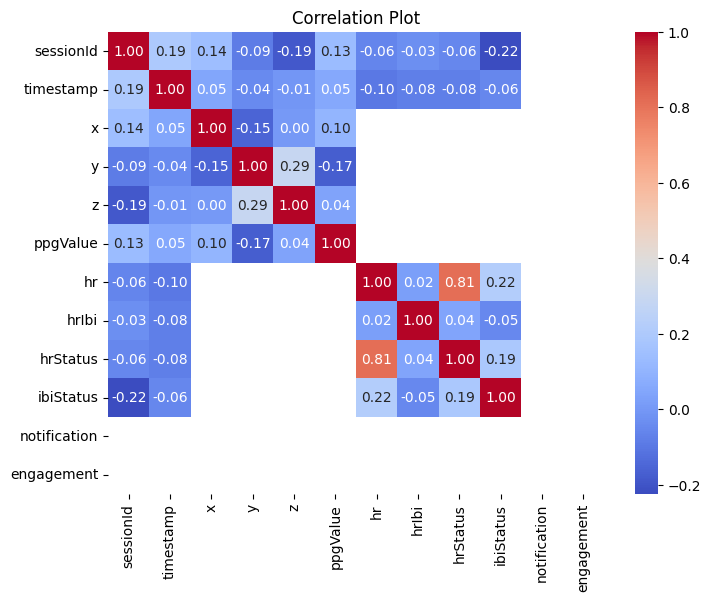

In [126]:
import seaborn as sns
correlation_matrix = Data1.drop(Data1.columns[-2:], axis=1).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.show()

In [125]:
Data1[:-2]

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context
0,1,8,653.0,195.0,4324.0,1917829.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,50,659.0,198.0,4096.0,1917495.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,89,645.0,149.0,4054.0,1917365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,128,752.0,213.0,4090.0,1918146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,169,652.0,232.0,4088.0,1919319.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8824671,48,4225375,-778.0,-129.0,4007.0,3379869.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8824672,48,4225415,-950.0,-146.0,3535.0,3360408.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8824673,48,4225425,NaN,NaN,NaN,NaN,0.0,0.0,-10.0,0.0,NaN,NaN,NaN,NaN
8824674,48,4225455,-808.0,42.0,4038.0,3349663.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
Data1.iloc[12872:13024]["affect"]

12872        NaN
12873        NaN
12874        NaN
12875        NaN
12876        NaN
          ...   
13019        NaN
13020        NaN
13021        NaN
13022        NaN
13023    RELAXED
Name: affect, Length: 152, dtype: object

In [75]:
len(Data1)

8824678

In [57]:
context = Data1["engagement"].notna()
Data1["engagement"][context].unique()

array([1.])

In [36]:
affect = Data1["affect"].notna()
Data1["affect"][affect].unique()

array(['RELAXED', 'HAPPY', 'ANGRY', 'SAD'], dtype=object)

In [37]:
Data1["sessionId"].unique()

array([ 1,  2,  3,  4,  6,  7,  8,  9, 10, 14, 15, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 49, 50, 51, 53, 54, 55, 56, 57, 58, 30, 11, 16,
       28, 48])

In [11]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8824678 entries, 0 to 8824677
Data columns (total 14 columns):
 #   Column        Dtype  
---  ------        -----  
 0   sessionId     int64  
 1   timestamp     int64  
 2   x             float64
 3   y             float64
 4   z             float64
 5   ppgValue      float64
 6   hr            float64
 7   hrIbi         float64
 8   hrStatus      float64
 9   ibiStatus     float64
 10  notification  float64
 11  engagement    float64
 12  affect        object 
 13  context       object 
dtypes: float64(10), int64(2), object(2)
memory usage: 942.6+ MB


In [50]:
Data1.dropna(inplace=False)

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context


In [129]:
data = Data1[Data1['ppgValue'].notna() & Data1['hr'].notna()]
data

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context


In [84]:
data[data["x"].notna()]

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context


In [77]:
data["affect"].unique()

array(['RELAXED', nan, 'HAPPY', 'ANGRY', 'SAD'], dtype=object)

In [46]:
data["sessionId"].unique()

array([ 1,  2,  3,  4,  6,  7,  8,  9, 10, 14, 15, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 49, 50, 51, 53, 54, 55, 56, 57, 58])

In [67]:
Data2 = pd.read_csv("SessionData-all.csv")
Data2.head()

,id,duration,watchId,age,gender,fairNumber
0,1,8021351,0Q3V,18-25,female,1
1,2,3752526,0Q3V,26-30,male,1
2,3,3989497,0QED,18-25,male,1
3,4,4979198,0QED,18-25,male,1
4,5,4836199,0QVM,18-25,male,1


In [69]:
Data2["id"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58])

In [39]:
Data2["id"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58])

In [70]:
Data3 = pd.read_csv("prof_skeleton.csv")
Data3.head()

,sessionId,timestamp,affect,context
0,1,1652042,True,False
1,1,1658301,False,True
2,1,5914412,True,False
3,1,5921368,False,True
4,2,629724,True,False


In [76]:
len(Data3)

261

In [74]:
Data3["sessionId"].unique()

array([ 1,  2,  3,  4,  6,  8,  9, 10, 14, 15, 17, 19, 20, 21, 22, 23, 24,
       25, 26, 27, 29, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 49, 50, 51, 53, 54, 55, 56, 57, 58, 30, 11, 16, 28, 48])